In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:
para=pd.read_excel('BankReviews.xlsx')
print(para.shape,para.head())

(505, 4)         Date  Stars                                            Reviews  \
0 2017-04-10      5  Great job, Wyndham Capital! Each person was pr...   
1 2017-02-10      5  Matthew Richardson is professional and helpful...   
2 2017-08-21      5  We had a past experience with Wyndham Mortgage...   
3 2017-12-17      5  We have been dealing with Brad Thomka from the...   
4 2016-05-27      5  I can't express how grateful I am for the supp...   

                   BankName  
0  Wyndham Capital Mortgage  
1  Wyndham Capital Mortgage  
2  Wyndham Capital Mortgage  
3  Wyndham Capital Mortgage  
4  Wyndham Capital Mortgage  


In [6]:
# So here we have Stars as Y variable and reviews,date and bankname  as X variable 
# since we have 2 distinct rating so we give 1 as 0 which is negative sentiment and 5 as 1 which is positive sentiment 
para['Stars'].replace({1:0},inplace=True)
para['Stars'].replace({5:1},inplace=True)

In [7]:
para.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,1,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,1,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,1,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,1,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,1,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [9]:
# Dropping Date and Bankname as they are of no use

para.drop(['Date','BankName'],axis=1,inplace=True)

In [10]:
# Cleaning  Reviews.

def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        #review=[stemmer.stem(w) for w in word_tokenize(str(review).lower())]
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review = [w for w in  review if w not in stopwords.words('english')]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [20]:
para['clean_review']=clean_review(para.Reviews.values)

In [21]:
para.head()

,Stars,Reviews,clean_review
0,1,"Great job, Wyndham Capital! Each person was pr...",great job wyndham capital person wa profession...
1,1,Matthew Richardson is professional and helpful...,matthew richardson professional helpful helped...
2,1,We had a past experience with Wyndham Mortgage...,past experience wyndham mortgage would without...
3,1,We have been dealing with Brad Thomka from the...,dealing brad thomka beginning started stressfu...
4,1,I can't express how grateful I am for the supp...,express grateful support zach provided family ...


In [23]:
# Creating Bag of Words Model.

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=2000,min_df=3,max_df=0.6,stop_words = stopwords.words('english'))
X=vectorizer.fit_transform(para.clean_review).toarray()

In [25]:
X.shape

(505, 1169)

In [31]:
# Creating TF-IDF model 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X= vectorizer.fit_transform(para.clean_review).toarray()

In [32]:
X.shape

(505, 1169)

In [33]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06184528, 0.        ,
        0.        ]])

In [35]:
Y=para['Stars']

In [36]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Stars, dtype: int64

In [37]:
Y.shape

(505,)

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [39]:
text_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Stars, dtype: int64

In [41]:
# Using Naive Bayes as classification model to predict the sentiment.
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sn

In [42]:
nb_clf = MultinomialNB()
nb_clf.fit(text_train,sent_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
nb_clf.predict( text_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [45]:
metrics.accuracy_score( sent_test, nb_clf.predict( text_test ) )

0.8355263157894737

Text(0.5, 15.0, 'Predicted label')

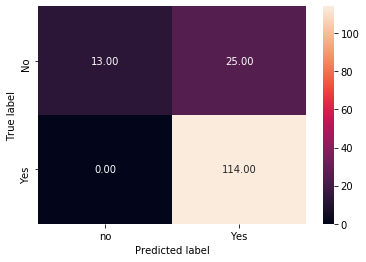

In [46]:
# Calculating confusion matrix
import matplotlib.pyplot as plt
nb_cm = metrics.confusion_matrix( sent_test,nb_clf.predict( text_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')